## Placement Data

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
dataset = pd.read_csv('DataPlacement.csv')
df = dataset.copy()
df.head()

,Branch,Degree,Score/800,Aptitude,English,Quantitative,Analytical,Domain,Computer Fundamental,Coding,Placement Status
0,Applied Electronics and Instrumentation,B. Tech.,584,69 %,87 %,53 %,67 %,30 %,20 %,60 %,Placed
1,Mechanical Engineering,B. Tech.,584,76 %,80 %,73 %,73 %,55 %,40 %,00 %,NaN
2,Electronics and Communications Engineering,B. Tech.,578,71 %,73 %,73 %,67 %,55 %,47 %,20 %,NaN
3,Applied Electronics and Instrumentation,B. Tech.,578,71 %,93 %,40 %,80 %,50 %,33 %,20 %,NaN
4,Electronics and Communications Engineering,B. Tech.,575,64 %,73 %,47 %,73 %,55 %,53 %,20 %,NaN


In [3]:
# chacking for the NaN values in the dataframe
df.isnull().any()

Branch                  False
Degree                  False
Score/800               False
Aptitude                False
English                 False
Quantitative            False
Analytical              False
Domain                  False
Computer Fundamental    False
Coding                  False
Placement Status         True
dtype: bool

In [18]:
# changing the 'Placement Status' column as a type category by taking care of the NaN values too
df['Placement Status'] = df['Placement Status'].astype('category').cat.codes
df.head()

,Branch,Degree,Score/800,Aptitude,English,Quantitative,Analytical,Domain,Computer Fundamental,Coding,Placement Status
0,Applied Electronics and Instrumentation,B. Tech.,584,69 %,87 %,53 %,67 %,30 %,20 %,60 %,1
1,Mechanical Engineering,B. Tech.,584,76 %,80 %,73 %,73 %,55 %,40 %,00 %,0
2,Electronics and Communications Engineering,B. Tech.,578,71 %,73 %,73 %,67 %,55 %,47 %,20 %,0
3,Applied Electronics and Instrumentation,B. Tech.,578,71 %,93 %,40 %,80 %,50 %,33 %,20 %,0
4,Electronics and Communications Engineering,B. Tech.,575,64 %,73 %,47 %,73 %,55 %,53 %,20 %,0


In [19]:
df.isnull().any()

Branch                  False
Degree                  False
Score/800               False
Aptitude                False
English                 False
Quantitative            False
Analytical              False
Domain                  False
Computer Fundamental    False
Coding                  False
Placement Status        False
dtype: bool

In [20]:
new_df = df[['Score/800','Aptitude', 'English', 'Quantitative', 'Analytical','Domain', 'Computer Fundamental', 'Coding', 'Placement Status']]
new_df.head()

,Score/800,Aptitude,English,Quantitative,Analytical,Domain,Computer Fundamental,Coding,Placement Status
0,584,69 %,87 %,53 %,67 %,30 %,20 %,60 %,1
1,584,76 %,80 %,73 %,73 %,55 %,40 %,00 %,0
2,578,71 %,73 %,73 %,67 %,55 %,47 %,20 %,0
3,578,71 %,93 %,40 %,80 %,50 %,33 %,20 %,0
4,575,64 %,73 %,47 %,73 %,55 %,53 %,20 %,0


In [21]:
# removing the percentage sign from the required columns and converting them to float
new_df['Aptitude'] = (new_df['Aptitude'].str.strip('%').astype(float))
new_df['English'] = (new_df['English'].str.strip('%').astype(float))
new_df['Quantitative'] = (new_df['Quantitative'].str.strip('%').astype(float))
new_df['Analytical'] = (new_df['Analytical'].str.strip('%').astype(float))
new_df['Domain'] = (new_df['Domain'].str.strip('%').astype(float))
new_df['Computer Fundamental'] = (new_df['Computer Fundamental'].str.strip('%').astype(float))
new_df['Coding'] = (new_df['Coding'].str.strip('%').astype(float))

C:\Users\AneervanRay\Anaconda_3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [23]:
new_df['Score/800'] = new_df['Score/800'].astype(float)

C:\Users\AneervanRay\Anaconda_3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [24]:
new_df.head()

,Score/800,Aptitude,English,Quantitative,Analytical,Domain,Computer Fundamental,Coding,Placement Status
0,584.0,69.0,87.0,53.0,67.0,30.0,20.0,60.0,1
1,584.0,76.0,80.0,73.0,73.0,55.0,40.0,0.0,0
2,578.0,71.0,73.0,73.0,67.0,55.0,47.0,20.0,0
3,578.0,71.0,93.0,40.0,80.0,50.0,33.0,20.0,0
4,575.0,64.0,73.0,47.0,73.0,55.0,53.0,20.0,0


In [30]:
X = new_df.iloc[:,:-1].values
y = new_df.iloc[:, -1].values

In [28]:
X

,Score/800,Aptitude,English,Quantitative,Analytical,Domain,Computer Fundamental,Coding
0,584.0,69.0,87.0,53.0,67.0,30.0,20.0,60.0
1,584.0,76.0,80.0,73.0,73.0,55.0,40.0,0.0
2,578.0,71.0,73.0,73.0,67.0,55.0,47.0,20.0
3,578.0,71.0,93.0,40.0,80.0,50.0,33.0,20.0
4,575.0,64.0,73.0,47.0,73.0,55.0,53.0,20.0
...,...,...,...,...,...,...,...,...
12859,401.0,31.0,47.0,20.0,27.0,35.0,40.0,0.0
12860,386.0,31.0,33.0,20.0,40.0,0.0,13.0,0.0
12861,374.0,29.0,13.0,47.0,27.0,10.0,53.0,0.0
12862,374.0,29.0,20.0,33.0,33.0,25.0,13.0,0.0


In [29]:
y

0        1
1        0
2        0
3        0
4        0
        ..
12859    0
12860    0
12861    0
12862    0
12863    0
Name: Placement Status, Length: 12864, dtype: int8

In [31]:
# Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [43]:
print('-------------------Training Set of X------------------')
print(pd.DataFrame(X_train))
print('-------------------Training Set of Y------------------')
print(pd.DataFrame(y_train))

-------------------Training Set of X------------------
          0     1     2     3     4     5     6     7
0     416.0  33.0  33.0  33.0  33.0  15.0  33.0   0.0
1     494.0  51.0  40.0  47.0  67.0  55.0  20.0   0.0
2     437.0  38.0  33.0  33.0  47.0  30.0  27.0   0.0
3     446.0  38.0  47.0  27.0  40.0  40.0  60.0   0.0
4     551.0  62.0  80.0  53.0  53.0  50.0  47.0  20.0
...     ...   ...   ...   ...   ...   ...   ...   ...
9643  383.0  27.0  40.0  13.0  27.0  40.0  40.0   0.0
9644  440.0  38.0  47.0   7.0  60.0  40.0  20.0   0.0
9645  503.0  51.0  73.0  27.0  53.0  40.0  33.0   0.0
9646  437.0  38.0  33.0  33.0  47.0  20.0  20.0   0.0
9647  485.0  47.0  27.0  47.0  67.0  25.0  40.0   0.0

[9648 rows x 8 columns]
-------------------Training Set of Y------------------
      0
0     0
1     0
2     0
3     0
4     0
...  ..
9643  0
9644  0
9645  1
9646  0
9647  0

[9648 rows x 1 columns]


In [44]:
print('-------------------Test Set of X------------------')
print(pd.DataFrame(X_test))
print('-------------------Test Set of Y------------------')
print(pd.DataFrame(y_test))

-------------------Test Set of X------------------
          0     1     2     3     4     5     6     7
0     458.0  38.0  27.0  20.0  67.0  40.0  33.0   0.0
1     488.0  47.0  40.0  47.0  53.0  55.0  33.0   0.0
2     560.0  69.0  80.0  47.0  80.0  25.0  27.0  20.0
3     485.0  47.0  40.0  33.0  67.0  30.0  47.0  20.0
4     419.0  33.0  33.0  20.0  47.0  35.0  53.0  32.0
...     ...   ...   ...   ...   ...   ...   ...   ...
3211  425.0  33.0  40.0  27.0  33.0  55.0  47.0   0.0
3212  458.0  44.0  60.0  40.0  33.0  40.0  33.0   0.0
3213  470.0  42.0  73.0   0.0  53.0  50.0  47.0   0.0
3214  533.0  67.0  67.0  53.0  80.0  35.0  33.0   0.0
3215  494.0  53.0  67.0  40.0  53.0  25.0  40.0   0.0

[3216 rows x 8 columns]
-------------------Test Set of Y------------------
      0
0     0
1     0
2     0
3     0
4     0
...  ..
3211  0
3212  0
3213  0
3214  0
3215  0

[3216 rows x 1 columns]


In [45]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### K Nearest Neghbours Classification

In [66]:
# Fitting K-NN to train the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [67]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [68]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print("My Confusion Matrix:", confusion_matrix(y_test, y_pred))

My Confusion Matrix: [[2989   36]
 [ 120   71]]


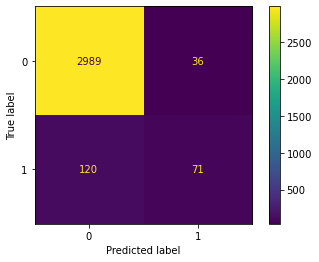

In [69]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
plot_confusion_matrix(classifier, X_test, y_test)

In [73]:
from sklearn.metrics import accuracy_score
print("Testing Accuracy: ", accuracy_score(y_test, y_pred))

Testing Accuracy:  0.9514925373134329


### Naive Bayes Classification

In [76]:
from sklearn.naive_bayes import GaussianNB

# creating a model
model = GaussianNB()

# fitting the training data to the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# calculating the classification accuracies
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 0.8793532338308457
Testing Accuracy : 0.867226368159204


In [77]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print("My Confusion Matrix:", confusion_matrix(y_test, y_pred))

My Confusion Matrix: [[2698  327]
 [ 100   91]]


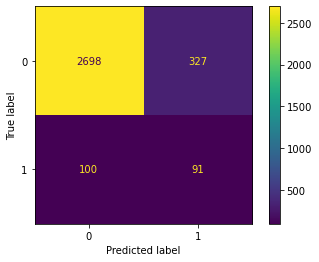

In [78]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
plot_confusion_matrix(model, X_test, y_test)

### Decision Tree Classification

In [81]:
from sklearn.tree import DecisionTreeClassifier

# creating a model
classifier = DecisionTreeClassifier()

# fitting the training data to the model
classifier.fit(X_train, y_train)

# predicting the x-test results
y_pred = classifier.predict(X_test)

# calculating the accuracies
print("Training Accuracy :", classifier.score(X_train, y_train))
print("Testing Accuracy :", classifier.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9738805970149254


In [82]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print("My Confusion Matrix:", confusion_matrix(y_test, y_pred))

My Confusion Matrix: [[2985   40]
 [  44  147]]


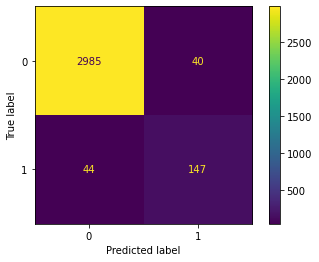

In [83]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
plot_confusion_matrix(classifier, X_test, y_test)

In [85]:
k=classifier.predict(sc.transform([[585, 70, 88, 54, 68, 31, 21, 21]]))
print("New customer class:",k)
if k[0]==0:
    print("Placed")
else:
    print("Not placed")

New customer class: [0]
Placed
